<a href="https://colab.research.google.com/github/Karthick47v2/speech-emotion-classifier/blob/main/ser_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import pandas as pd
import numpy as np
import cv2
import librosa 
import librosa.display
import matplotlib.pyplot as plt

import IPython.display as ipd

In [7]:
y, sr = librosa.load('test.wav', mono=True)
y_t, idx = librosa.effects.trim(y, top_db=50)

Text(0.5, 1.0, 'waveform')

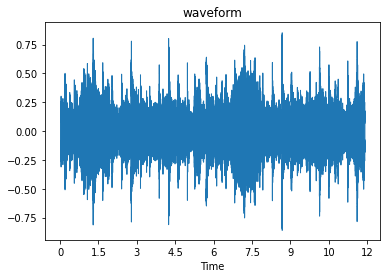

In [8]:
librosa.display.waveshow(y, sr=sr)
plt.title('waveform')

In [5]:
ipd.Audio('test.wav')

In [11]:
len(y)

262139

In [ ]:


def load_wav(path, stop=160000):
  # 22.05 kHz, 16 bit
  y, sr = librosa.load(path, mono=True)
  trimmed_y, idx = librosa.effects.trim(y[:stop], top_db=50) 
  normalized_y = librosa.util.normalize(trimmed_y)
  return normalized_y, sr



def extract_mfcc(y, n_mfcc):
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
  normalized_mfcc = librosa.util.normalize(mfcc)

  return normalized_mfcc

def extract_mel(y, n_mel, n_fft, hop_length):
  stft = librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length)

  mel = librosa.feature.melspectrogram(S=stft, n_mels=n_mel)
  mel_db = librosa.amplitude_to_db(abs(mel))
  normalized_mel = librosa.util.normalize(mel_db)

  return normalized_mel



def add_padding(x, padding):
  padded_x = []

  for i in x:
    sh = len(i[0])

    if padding > 0 & sh < padding:
      x = padding - sh
      l_pad = x // 2
      r_pad = x - l_pad
      i = np.pad(i, pad_width=((0,0), (l_pad,r_pad)), mode='constant')

    padded_x.append(i)

  return padded_x



In [ ]:
mfcc = []
mel = []
label = []
max_mfcc_frame = 308
max_mel_frame = 308

add_aug = False

for idx, row in df.iterrows():
  y, sr = load_wav(row['path'])

  print(row['path'])


  ex_mfcc = extract_mfcc(y, 13)
  ex_mel = extract_mel(y, 128, 2048, 512)

  mfcc.append(ex_mfcc)
  mel.append(ex_mel)
  label.append(row['emotion'])


padded_mfcc = add_padding(mfcc, max_mfcc_frame)
padded_mel = add_padding(mel, max_mel_frame)